<a href="https://colab.research.google.com/github/sidkatiyar09/Applied-Machine-Learning/blob/main/food_10_categories_capstone_Densenet201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install tensorflow
# # !pip install keras.image.ImageDataGenerator
# # !pip install tensorflow opencv-python -q
# !pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 777.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.0 MB/s eta 0:00:00


In [5]:
import plotly.express as px
from keras.applications.densenet import DenseNet201
from keras.applications.densenet import preprocess_input
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras import layers
from sklearn.manifold import TSNE

In [6]:

import tensorflow as tf

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from keras import layers
from keras import Sequential
import keras
from keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

#Loading DATASET

DATA_DIR = "/content/drive/MyDrive/Capstone project 2/food_subset/"
BATCH_SIZE = 64
IMG_SIZE = (299, 299)

In [7]:
train_datagen= ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

In [8]:
train_ds=train_datagen.flow_from_directory(
    DATA_DIR+'/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'

)
val_ds=train_datagen.flow_from_directory(
    DATA_DIR+'/train',
    target_size=IMG_SIZE,

    batch_size=BATCH_SIZE,
    # validation_split=0.2,
    subset='validation',
   class_mode='binary'

)

Found 5609 images belonging to 10 classes.
Found 1401 images belonging to 10 classes.


In [9]:
test_datagen= ImageDataGenerator(rescale=1/255.0)

test_ds=test_datagen.flow_from_directory(
    DATA_DIR +'/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 1502 images belonging to 10 classes.


In [10]:
class_names = train_ds.class_indices
class_names

{'apple_pie': 0,
 'caesar_salad': 1,
 'chicken_curry': 2,
 'french_fries': 3,
 'fried_rice': 4,
 'hamburger': 5,
 'ice_cream': 6,
 'pizza': 7,
 'spaghetti_bolognese': 8,
 'sushi': 9}

In [11]:
train_ds.class_indices

{'apple_pie': 0,
 'caesar_salad': 1,
 'chicken_curry': 2,
 'french_fries': 3,
 'fried_rice': 4,
 'hamburger': 5,
 'ice_cream': 6,
 'pizza': 7,
 'spaghetti_bolognese': 8,
 'sushi': 9}

#class imbalance
checking for imbalance dataset

In [12]:
from collections import Counter
Counter(train_ds.labels)

Counter({np.int32(0): 560,
         np.int32(1): 560,
         np.int32(2): 560,
         np.int32(3): 565,
         np.int32(4): 560,
         np.int32(5): 564,
         np.int32(6): 560,
         np.int32(7): 560,
         np.int32(8): 560,
         np.int32(9): 560})

In [13]:
train_ds.class_indices

{'apple_pie': 0,
 'caesar_salad': 1,
 'chicken_curry': 2,
 'french_fries': 3,
 'fried_rice': 4,
 'hamburger': 5,
 'ice_cream': 6,
 'pizza': 7,
 'spaghetti_bolognese': 8,
 'sushi': 9}

In [14]:
from sklearn.utils import class_weight
import numpy as np

In [15]:
labels=Counter(train_ds.labels)

y = np.array(train_ds.labels)  # Assuming `train_ds.labels` is available
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(enumerate(weights))
class_weight_dict

{0: np.float64(1.001607142857143),
 1: np.float64(1.001607142857143),
 2: np.float64(1.001607142857143),
 3: np.float64(0.9927433628318584),
 4: np.float64(1.001607142857143),
 5: np.float64(0.9945035460992908),
 6: np.float64(1.001607142857143),
 7: np.float64(1.001607142857143),
 8: np.float64(1.001607142857143),
 9: np.float64(1.001607142857143)}

In [16]:
class_weight_dict


{0: np.float64(1.001607142857143),
 1: np.float64(1.001607142857143),
 2: np.float64(1.001607142857143),
 3: np.float64(0.9927433628318584),
 4: np.float64(1.001607142857143),
 5: np.float64(0.9945035460992908),
 6: np.float64(1.001607142857143),
 7: np.float64(1.001607142857143),
 8: np.float64(1.001607142857143),
 9: np.float64(1.001607142857143)}

# densenet201


# scaling


# base model DEnsenet201

In [17]:
base_model = DenseNet201(include_top=False, weights="imagenet",  input_shape=(299, 299, 3))
# base_model.trainable = False

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#fine tuning

In [18]:
base_model.trainable=True

In [19]:
#freezing all layers
# except last 50
for layers in base_model.layers[ :-50]:
    layers.trainable=False

# Transfer learning

In [20]:
train_feature=base_model.predict(train_ds)
val_feature=base_model.predict(val_ds)
test_feature=base_model.predict(test_ds)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 1396s 16s/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1642s 78s/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1727s 75s/step


In [22]:
train_labels=train_ds.labels
val_labels=val_ds.labels
test_labels=test_ds.labels

In [21]:
train_feature.shape

(5609, 9, 9, 1920)

In [23]:
train_labels.shape

(5609,)

In [24]:
test_feature.shape

(1502, 9, 9, 1920)

In [25]:
train_feature.shape

(5609, 9, 9, 1920)

# pooling block

In [26]:
from tensorflow.keras.layers import GlobalAveragePooling2D

# Apply GlobalAveragePooling2D to the feature maps converting
pooling = GlobalAveragePooling2D()
train_feature_pooled = pooling(train_feature)
val_feature_pooled = pooling(val_feature)
test_feature_pooled = pooling(test_feature)
train_feature_pooled.shape


TensorShape([5609, 1920])

# **PCA**

In [27]:
from sklearn.decomposition import IncrementalPCA
# incrementPCA =IncrementalPCA(n_components=1920)
incrementPCA = IncrementalPCA(n_components=256)

In [28]:
# Apply PCA on the pooled features
incrementPCA.fit(train_feature_pooled)


IncrementalPCA(n_components=256)

In [29]:
# Transform the pooled features using PCA
train_pca=incrementPCA.transform(train_feature_pooled)
val_pca=incrementPCA.transform(val_feature_pooled)
test_pca=incrementPCA.transform(test_feature_pooled)
train_pca.shape


(5609, 256)

In [ ]:
test_pca.shape

(600, 256)

In [ ]:
val_pca.shape

(120, 256)

# visual representation of extracted and pca transformed features
# using TSNE

#binary classifier

In [ ]:
train_labels=train_ds.labels
val_labels=val_ds.labels

# Input is now feature maps, not raw images
feature_input = layers.Input(shape=(256,))
# x = GlobalAveragePooling2D()(feature_input)
x = Dense(256, activation='relu')(feature_input)
x = layers.Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=feature_input, outputs=output)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(train_feature, train_labels, validation_data=(val_feature, val_labels), epochs=10,callbacks=[callback1])

#saving model via callback modelcheckpoint

In [ ]:
from keras.callbacks import ModelCheckpoint

callback1=ModelCheckpoint(
    filepath='/content/drive/MyDrive/Capstone project 2/densenet201.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max' ,#mode='auto' chooses max for when monitor=val_accuracy monitoring only accuracy,
               #when monitor = loss we or it chooses mode= min
    save_freq='epoch',
    verbose=1
)


#saving the trained model

In [ ]:
# saved a trial
model.save('Denenet201.h5')
model.save('/content/drive/MyDrive/Capstone project 2/densenet201.h5')

#training

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
earlystop1= EarlyStopping(monitor='val_accuracy',patience=3,mode='max',restore_best_weights=True)

In [ ]:
EPOCHS = 10
history = model.fit(train_pca,train_labels, validation_data=(val_pca,val_labels), epochs=40,callbacks=[callback1],class_weight=class_weight_dict)

Epoch 1/40
 1/15 ━━━━━━━━━━━━━━━━━━━━ 10s 748ms/step - accuracy: 0.2188 - loss: 1.1788
Epoch 1: val_accuracy improved from -inf to 0.52500, saving model to /content/drive/MyDrive/Capstone project 2/densenet201.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4600 - loss: 0.8741 - val_accuracy: 0.5250 - val_loss: 0.6942
Epoch 2/40
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5312 - loss: 0.7413
Epoch 2: val_accuracy improved from 0.52500 to 0.54167, saving model to /content/drive/MyDrive/Capstone project 2/densenet201.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5379 - loss: 0.7368 - val_accuracy: 0.5417 - val_loss: 0.6851
Epoch 3/40
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5000 - loss: 0.7448
Epoch 3: val_accuracy did not improve from 0.54167
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 0.6981 - val_accuracy: 0.5167 - val_loss: 0.6906
Epoch 4/40
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5938 - loss: 0.7577
Epoch 4: val_accuracy did not improve from 0.54167
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6502 - loss: 0.6555 - val_accuracy: 0.4833 - val_loss: 0.7074
Epoch 5/40
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5938 - loss: 0.6753
Epoch 5: val_accuracy improved from 0.54167 to 0.61667, saving model to /content/drive/MyDrive/Capstone project 2/densenet201.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6453 - loss: 0.6622 - val_accuracy: 0.6167 - val_loss: 0.6717
Epoch 6/40
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7198 - loss: 0.5755 
Epoch 6: val_accuracy did not improve from 0.61667
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7199 - loss: 0.5736 - val_accuracy: 0.5083 - val_loss: 0.7113
Epoch 7/40
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8125 - loss: 0.4668
Epoch 7: val_accuracy did not improve from 0.61667
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7569 - loss: 0.5200 - val_accuracy: 0.5417 - val_loss: 0.7121
Epoch 8/40
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8438 - loss: 0.3558
Epoch 8: val_accuracy did not improve from 0.61667
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7866 - loss: 0.4567 - val_accuracy: 0.5667 - val_loss: 0.7287
Epoch 9/40
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8438 - loss: 0.3270
Epoch 9: val_accuracy did not improve from 0.

# evaluate

Data Augmented
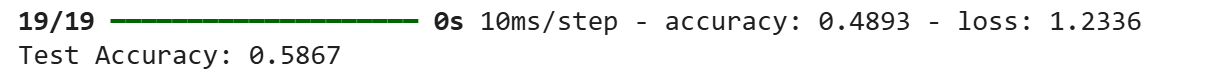


# EVALUATE ON TEST SET


In [ ]:
test_labels=test_ds.labels
test_loss, test_accuracy = model.evaluate(test_pca,test_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4106 - loss: 4.5349 
Test Accuracy: 0.6017


#data not augmnted
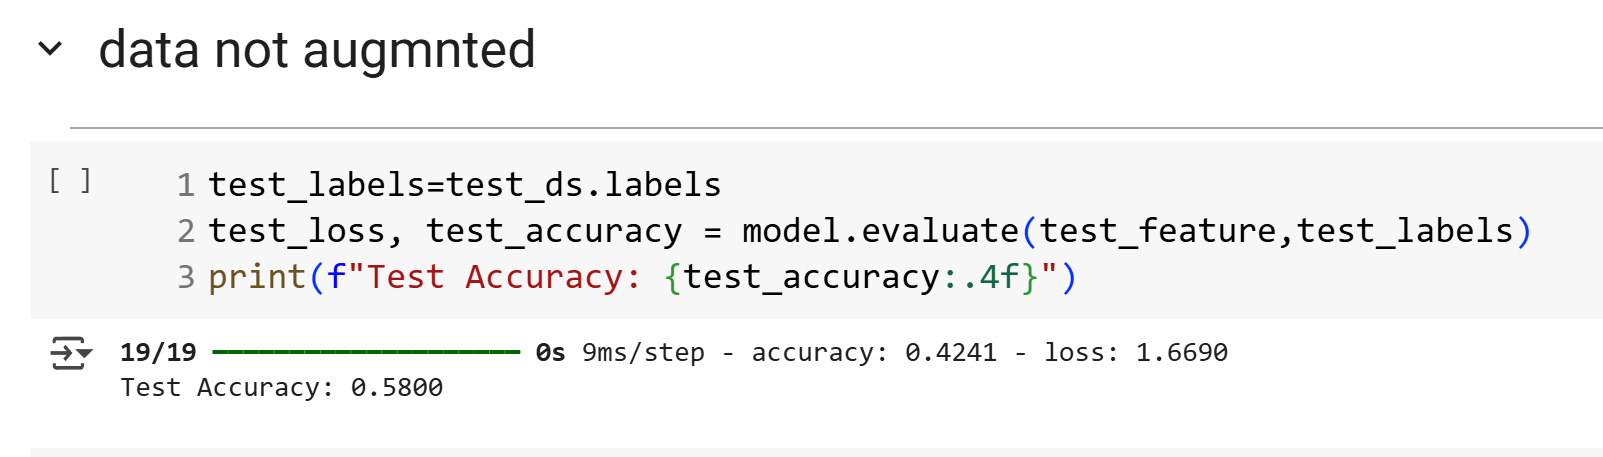




In [ ]:
test_labels=test_ds.labels
test_loss, test_accuracy = model.evaluate(test_pca,test_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4106 - loss: 4.5349 
Test Accuracy: 0.6017


#plot
train accuracy vs val accuracy

In [ ]:
epochs=range(1,len(history.history['accuracy'])+1)

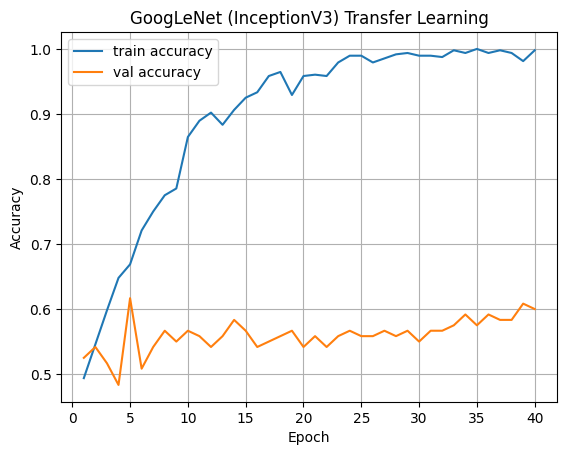

In [ ]:
plt.plot(epochs,history.history['accuracy'], label='train accuracy')
plt.plot(epochs,history.history['val_accuracy'], label='val accuracy')
plt.title('GoogLeNet (InceptionV3) Transfer Learning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
